In [377]:
import numpy as np
import json
import os
import networkx as nx
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

In [396]:
class Visualization():
    def __init__(self,path):
        self.path = path
        self.data = []
        self.fitness = {}
        self.nodes = {}
        self.loadData()
        self.getNodesByPopulation()
        self.getFitnessByPopulation()
        
    def loadData(self):
        for file in os.listdir(self.path):
            if ".json" in file and file != "config.json":
                path = "{}/{}".format(self.path,file)
                with open(path) as json_file:
                    self.data.append(json.load(json_file))
        self.data = sorted(self.data,key = lambda x : x["generation"])
    
    def getFitnessByPopulation(self):
        fitness = {}
        for world in self.data:
            for population in world["populations"]:
                goal = population["goal"]
                if goal not in fitness:
                    fitness[goal] = []
                fitness[goal].append([population["generation"],population["average"]])
        for goal in fitness:
            fitness[goal] = np.array(sorted(fitness[goal],key=lambda x:x[0]))
        self.fitness = fitness
    
    def getFitnessGraph(self,popid):
        fig, ax = plt.subplots(figsize=(20,10))
        ax.plot(self.fitness[popid][:,0],self.fitness[popid][:,1])
        ax.set_title('Fitness of class {}'.format(popid),fontsize=18,color='orange')
        ax.set_xlabel('Generations',fontsize=18,color='orange')
        ax.set_ylabel('Average fitness',fontsize=18,color='orange')
        ax.tick_params(labelsize=18,labelcolor='orange')
        return ax
    
    def getNodesByPopulation(self):
        nodes = {}
        for world in self.data:
            for population in world["populations"]:
                goal = population["goal"]
                if goal not in nodes:
                    nodes[goal] = {}
                for chromosome in population["chromosomes"]:
                    nodes[goal][chromosome["uuid"]] = chromosome
        self.nodes = nodes
        
    def getDendogram(self,idpop):
        labels = list(self.nodes[idpop].keys())
        idkey = {}
        for i,key in enumerate(self.nodes[idpop].keys()):
            idkey[key] = i
        matrix = np.zeros(shape=(len(labels),len(labels)))
        for node in self.nodes[idpop]:
            index = idkey[self.nodes[idpop][node]["uuid"]]
            parents = [idkey[x] for x in self.nodes[idpop][node]["parents"]]
            if len(parents) > 0:
                for parent in parents:
                    matrix[index][parent] = 1
        fig = ff.create_dendrogram(matrix, labels=labels)
        fig.update_layout(width=2500, height=1024)
        return fig
        
    def getAncestryGraph(self,idpop):
        idkey = {}
        labels = list(self.nodes[idpop].keys())
        source = []
        target = []
        value = []
        for i,key in enumerate(self.nodes[idpop].keys()):
            idkey[key] = i
        
        labels = [i for i in range(len(labels))]
        labels.append("no parent")
        for node in self.nodes[idpop]:
            parents = [idkey[x] for x in self.nodes[idpop][node]["parents"]]
            if len(parents) > 0:
                source += parents
                target += [idkey[self.nodes[idpop][node]["uuid"]] for i in range(len(parents))]
                value += [self.nodes[idpop][node]["generation"] for i in range(len(parents))]
            else:
                source.append(len(labels)-1)
                target.append(idkey[self.nodes[idpop][node]["uuid"]])
                value.append(self.nodes[idpop][node]["generation"])
            
        fig = go.Figure(data=[go.Sankey(
                      orientation = "h",
        node = dict(
                      pad = 15,
                      thickness = 20,
                      line = dict(color = "black", width = 0.5),
                      label = labels,
                      color = "blue"
                    ),
                    link = dict(
                      source = source, 
                      target = target,
                      value = value
                  ))],layout=dict(width = 2500,
                      height = 1024))

        fig.update_layout(title_text="Ancestry", font_size=10)
        return fig

In [397]:
visualization = Visualization("path/28_11_19_08_14_28")

In [342]:
fig = visualization.getDendogram("3")
fig.show()

In [343]:
fig = visualization.getAncestryGraph('3')
fig.show()

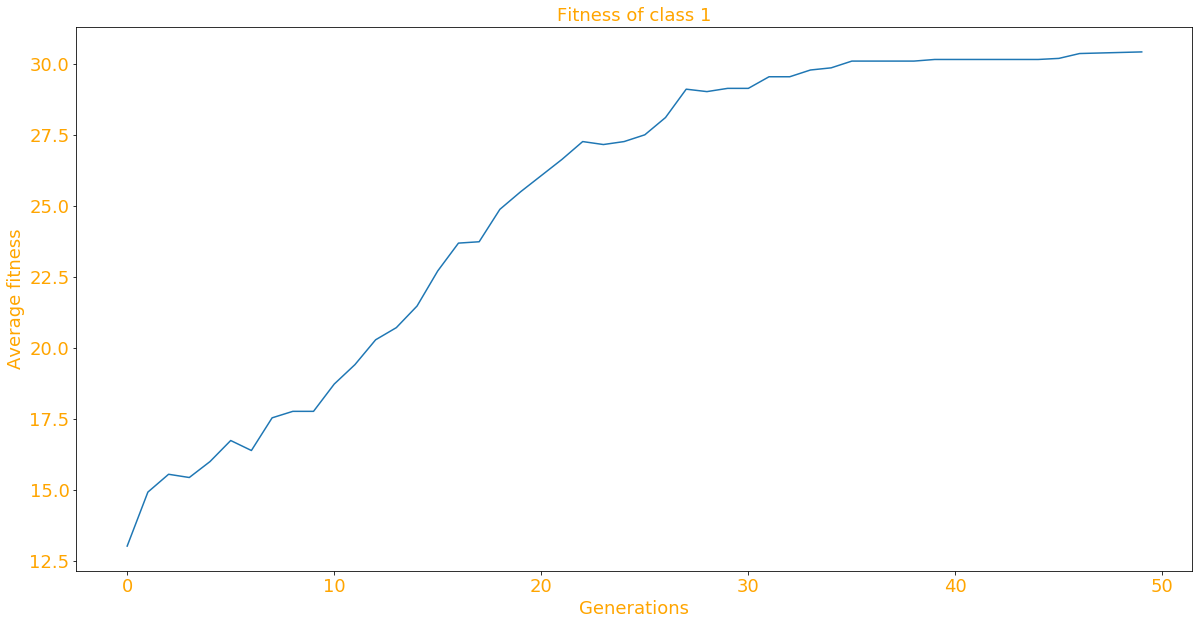

In [398]:
visualization.getFitnessGraph("1")

In [399]:
visualization = Visualization("2dfire/27_11_19_22_47_22")
fig = visualization.getAncestryGraph('2')
fig.show()

In [334]:
fig = visualization.getDendogram("0")
fig.show()

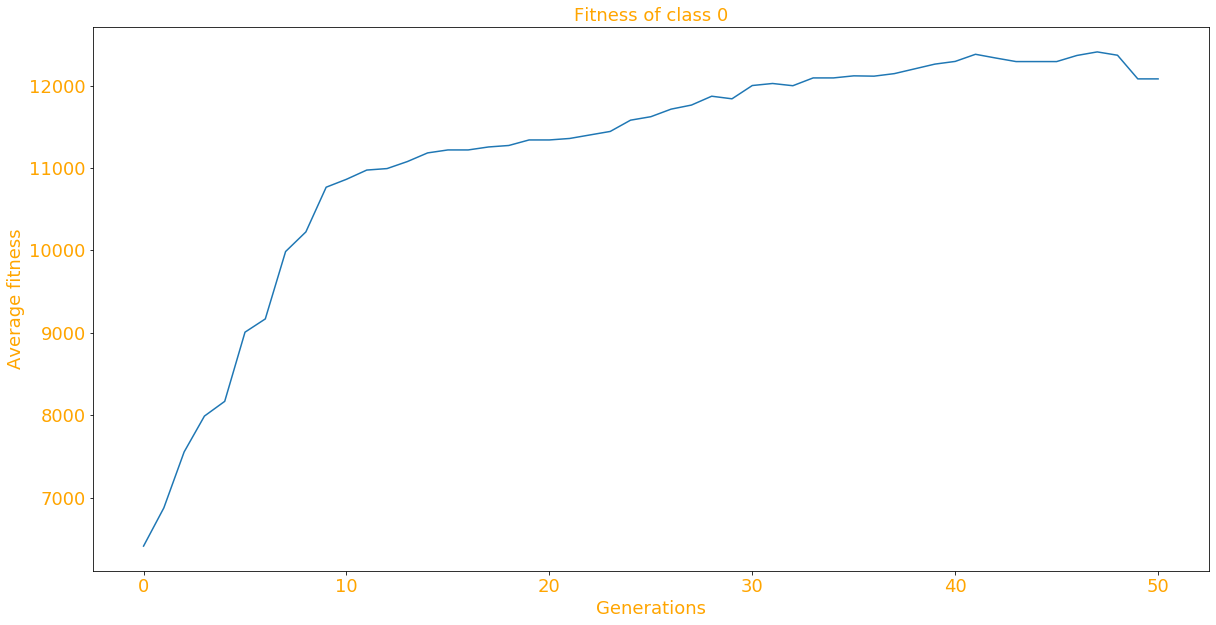

In [400]:
visualization.getFitnessGraph("0")

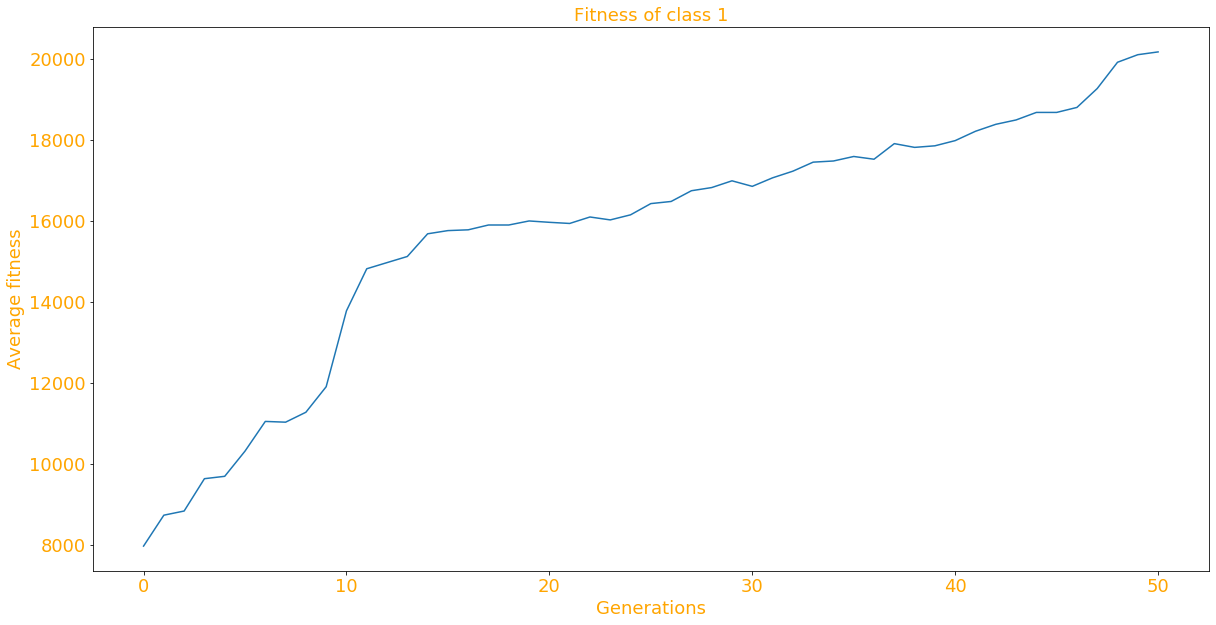

In [401]:
visualization.getFitnessGraph("1")

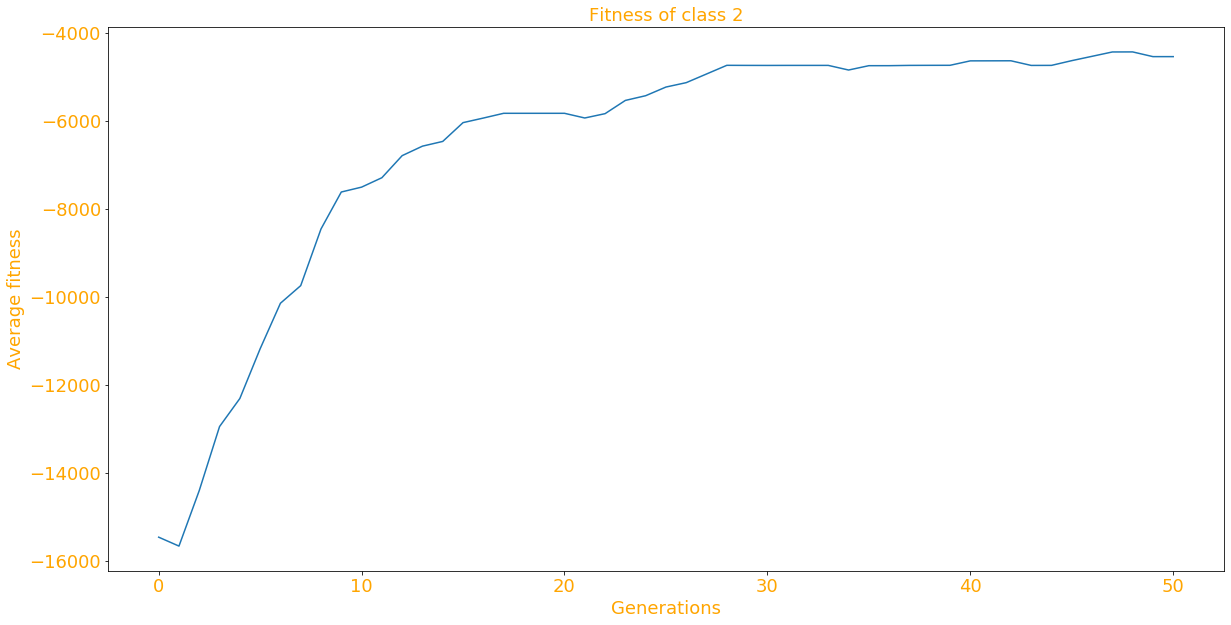

In [402]:
visualization.getFitnessGraph("2")

In [409]:
visualization = Visualization("2dfire/29_11_19_08_02_53")

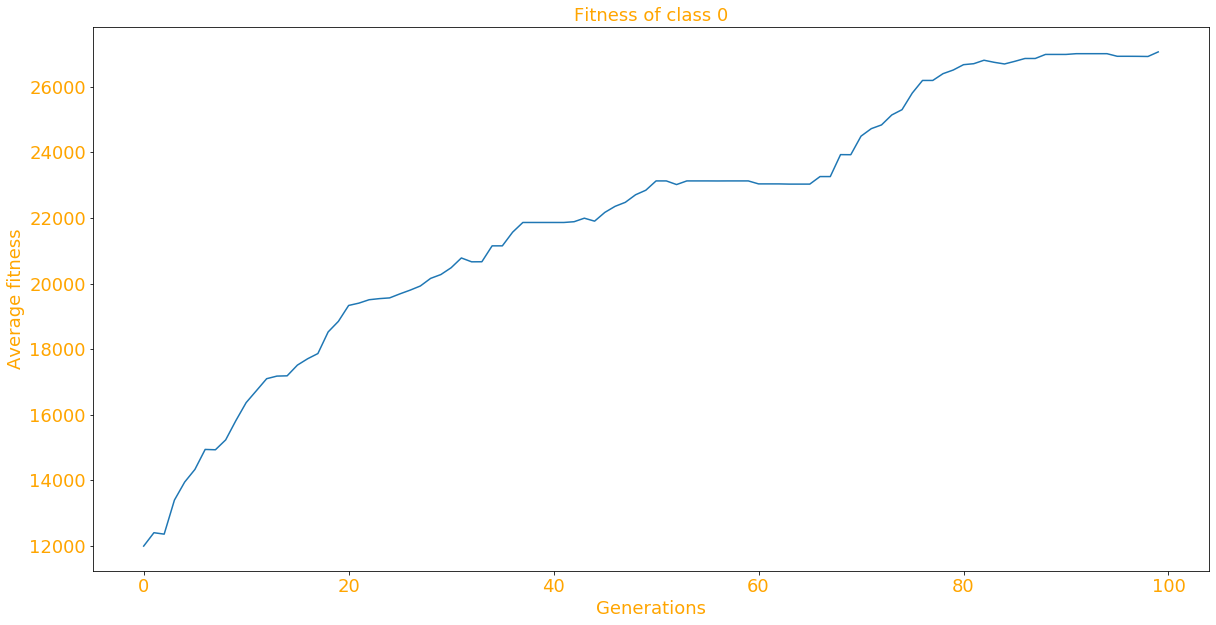

In [410]:
visualization.getFitnessGraph("0")

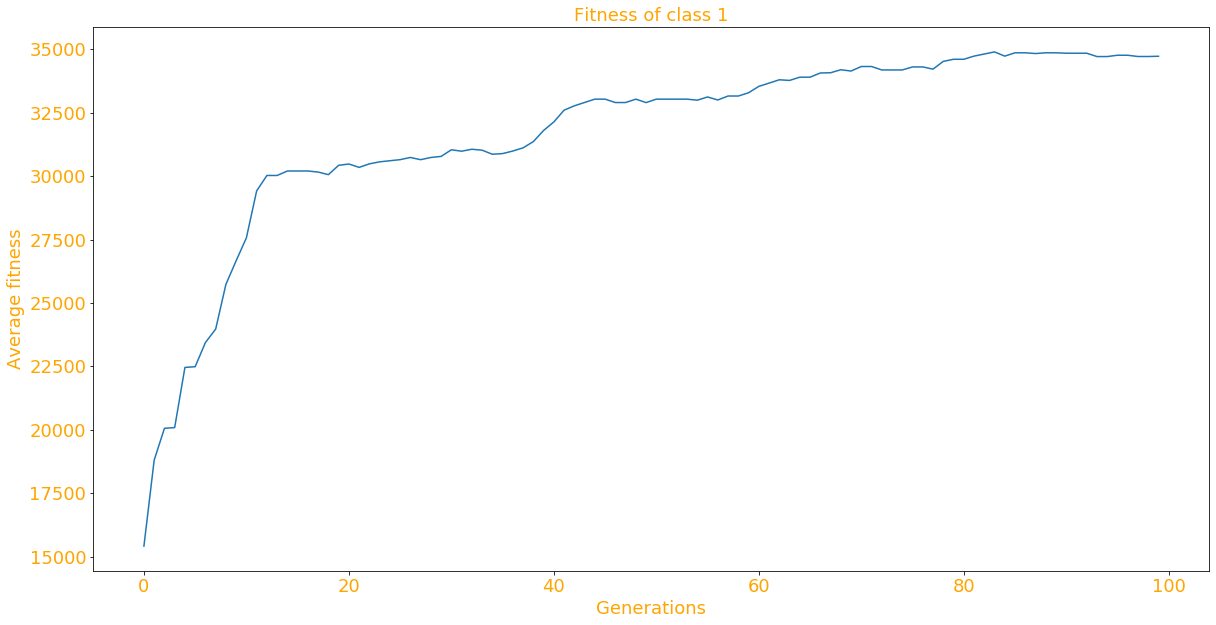

In [411]:
visualization.getFitnessGraph("1")

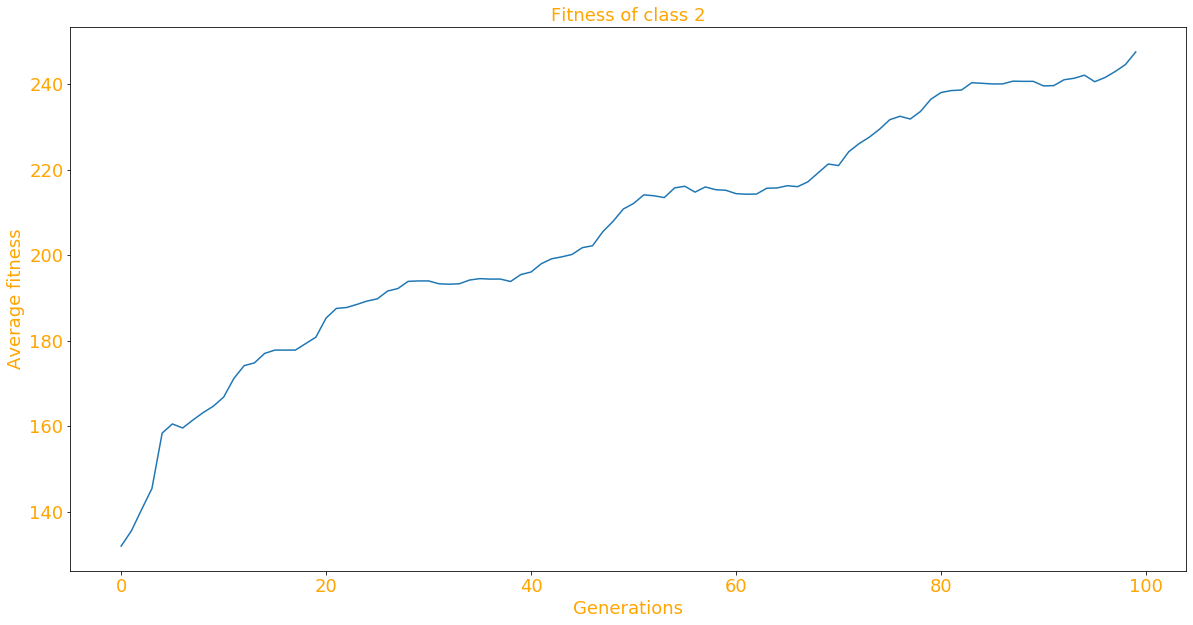

In [412]:
visualization.getFitnessGraph("2")

In [407]:
fig = visualization.getAncestryGraph('1')
fig.show()

In [408]:
fig = visualization.getDendogram("0")
fig.show()